<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="180" height="100" /></center>

## <center>Titanic</center>



<center><img src="https://static3.thetravelimages.com/wordpress/wp-content/uploads/2018/11/titanic1-e1542497861799.jpg" height=500 /></center>

# Introduction
<a id="introduction" ></a>
***
In this kernel, I am going to do a detailed statistical analysis of Titanic data set along with Machine learning models. I will also inclue visualizations to explain analysis and the machine learning models will be used to predict passenger survival status. Let's get started.

<center><h3>From now onward we will follow below TOC points</h3></center>

## Table of contents
***
- [Introduction](#introduction)
- [Kernel Goals](#aboutthiskernel)
- [1: Importing Necessary Modules](#import_libraries)
    - [1.1. Libraries](#import_libraries)
    - [1.2. Load datasets](#load_data)
    - [1.3. About this dataset](#aboutthisdataset)
- [2: Cleaning the Data](#scrubbingthedata)
    - [2.1. Dealing with missing values](#dealwithnullvalues)
- [3: Visualization and Feature Relations](#visualization_and_feature_relations)
    - [3.1. Gender and Survived](#gender_and_survived)
    - [3.2. Pclass and Survived](#pclass_and_survived)
    - [3.3. Fare and Survived](#fare_and_survived)
    - [3.4. Age and Survived](#age_and_survived)
    - [3.5. Combined Feature relations](#combined_feature_relations)
- [4: Statistical Overview](#statisticaloverview)
    - [4.1. Correlation Matrix and Heatmap](#heatmap)
- [5: Feature Engineering](#feature_engineering)
- [6: Pre-Modeling Tasks](#pre_model_tasks)
    - [6.1. Separating dependent and independent variables](#dependent_independent)
    - [6.2. Splitting the training data](#split_training_data)
    - [6.3. Feature Scaling](#feature_scaling)
- [7: Modeling the Data](#modelingthedata)
    - [7.1. Logistic Regression](#logistic_regression)
    - [7.2. K-Nearest Neighbors(KNN)](#knn)
    - [7.3. Gaussian Naive Bayes](#gaussian_naive)
    - [7.4. Support Vector Machines](#svm)
    - [7.5. Decision Tree Classifier](#decision_tree)
    - [7.6. Random Forest Classifier](#random_forest)
    - [7.7. Gradient Boosting Classifier](#gradient_boosting)
    - [7.8. XGB Classifier](#xgb_classifier)
    - [7.9 AdaBoost Classifier](#xgb_classifier)
    - [7.10 Bagging Classifier](#bagging_classifier)
    - [7.11 Extra Tree Classifier](#extratree)
    - [7.12. Voting Classifier](#voting_classifier)
- [8: Model Accuracy Visualization](#model_accuracy)
- [9: Submit test predictions](#submit_predictions)

# Kernel Goals
<a id="aboutthiskernel"></a>
***
There are two primary goals of this kernel.
- To do a statistical and exploratory data analysis of how some group of people was survived more than others through visualization.  
- And to create machine learning models that can predict the chances of passengers survival.

# <font color='blue'>1: Importing Necessary Libraries and datasets</font>
***
<a id="import_libraries**"></a>
### 1.1. Libraries


In [0]:
# Import necessary modules for data analysis and data visualization. 
# Data analysis modules
import pandas as pd
import numpy as np

# Visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Machine learning libraries
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV



## Ignore warning
# import warnings
# warnings.filterwarnings('ignore')

### 1.2. Load datasets
<a id="load_data"></a>
***

In [0]:
## Importing the training dataset
train =pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/titanic_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/titanic_test.csv")

### 1.3. About This Dataset
<a id="aboutthisdataset"></a>
***
**The following information about this dataset was derived from kaggle. **

The data has split into two groups:

- training set (train.csv)
- test set (test.csv)

***The training set includes our target variable, passenger survival status***(also known as the ground truth from the Titanic tragedy) along with other independent features like gender, class, fare, and Pclass. 

The test set should be used to see how well my model performs on unseen data. ***The test set does not provide passengers survival status***. We are going to use our model to predict passenger survival status.

Now let's go through the features and describe a little

**Variable    Definition    Key**
- **Survived** (Our outcome or dependent variable)
    - 0 = No
    - 1 = Yes
The Survived column is a binary nominal datatype 
- **pclass** (A proxy for socio-economic status (SES))    
    - 1 = 1st(Upper)
    - 2 = 2nd(Middle) 
    - 3 = 3rd(Lower)
- **sex**
    - 0 = Female
    - 1 = Male
- **Age**
- **sibsp** (# of siblings/spouses aboard the Titanic)    
- **parch**(# of parents/children aboard the Titanic)    
- **Passenger ID** and **Ticket** (are assumed to be random unique identifiers, therefore have no impact on the dependent variable. They will be excluded from the analysis. 
- **fare**
- **cabin**   
- **embarked**(Port of Embarkation)    
    - C = Cherbourg, 
    - Q = Queenstown, 
    - S = Southampton

| Column Name                       | Description                                                                                        |
| ----------------------------------|:--------------------------------------------------------------------------------------------------:|
| PassengerId                       | Passenger Identity                                                                                                   | 
| Survived                          | Whether passenger survived or not                                                                  | 
| Pclass                            | Class of ticket                                                                                    | 
| Name                              | Name of passenger                                                                                  | 
| Sex                               | Sex of passenger                                                                                   |
| Age                               | Age of passenger                                                                                   |
| SibSp                             | Number of sibling and/or spouse travelling with passenger                                          |
| Parch                             | Number of parent and/or children travelling with passenger                                         |
| Ticket                            | Ticket number                                                                                      |
| Fare                              | Price of ticket                                                                                    |
| Cabin                             | Cabin number                                                                                       |

# <font color='blue'>2: Overview and Cleaning the Data</font>
<a id="cleaningthedata"></a>
***

In [0]:
## saving passenger id in advance in order to submit later. 
passengerid = test.PassengerId

In [0]:
## We will drop PassengerID and Ticket since it will be useless for our data. 
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

This dataset is almost clean. However, before we jump into visualization and machine learning models, lets analyze and see what we have here.

In [0]:
print (train.info())
print ("*"*40)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float

It looks like, neither the features have the same amount of entries, nor they have only numerical(int, float) values, which can only mean...
* We may have missing values in our features.
* We may have categorical features. 
* We may have alphanumerical or/and text features. 


### 2.1. Dealing with Missing values
<a id="dealwithnullvalues"></a>
***

In [0]:
print (train.isnull().sum())
print (''.center(20, "*"))
print (test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
********************
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


We see that in both **train** and **test** dataset have missing values. Let's fix them. 

### Embarked feature
***

In [0]:
print (train.Embarked.value_counts(dropna=False))
##print ((train.Embarked.value_counts(dropna=False)/len(train.Embarked)*100))
print (train.Embarked.value_counts(dropna=False, normalize=True)*100)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64
S      72.278339
C      18.855219
Q       8.641975
NaN     0.224467
Name: Embarked, dtype: float64


It looks like there are only two null values( ~ 0.22 %) in the Embarked feature. Since this is less than 1%, we can replace these with mode value "S." 

In [0]:
train[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [0]:
train.Embarked.fillna(train.Embarked.mode()[0], inplace=True)
train.Embarked.isnull().sum()

0

### Cabin Feature
***

In [0]:
print(train.Cabin.isnull().sum()/len(train.Cabin))
print(test.Cabin.isnull().sum()/len(test.Cabin))

0.7710437710437711
0.7822966507177034


Approximately 77% of Cabin feature is missing in the training data. We have two choices, we can either get rid of the whole feature, or we can brainstorm a little and find an appropriate way to put them in use.
* We may say passengers with cabin records had a higher socio-economic-status then others. 
* We may also say passengers with cabin records were more likely to be taken into consideration for the rescue mission. 

I believe it would be wise to keep the data. We will assign all the null values as **"N"** for now and will put cabin column to good use in the feature engineering section.

In [0]:
train.Cabin[train.Cabin.isnull()] = 'N'
test.Cabin[test.Cabin.isnull()] = 'N'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


All the cabin names start with an english alphabet following by digits. We can group these cabins by the alphabets. 

In [0]:
train.Cabin = [i[0] for i in train.Cabin]
test.Cabin = [i[0] for i in test.Cabin]

In [0]:
print (train.isnull().sum())
print(''.center(15,'*'))
print(test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64
***************
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Cabin        0
Embarked     0
dtype: int64


### Fare Feature
***

In [0]:
test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,N,S


In [0]:
test.Fare.fillna(test.Fare.mean(), inplace=True)

In [0]:
test.Fare.isnull().sum()

0

### Age Feature
***

In [0]:
((train.Age.isnull().sum()/len(train))*100)

19.865319865319865



There are different ways to deal with Null values. Some standard approaches are mean, median and mode. However, we will take a different approach since **~20% data in the Age column is missing** and it would be unwise to replace the missing values with median, mean or mode. We will use pythons library **fancyimpute** where I can use **K Nearest neighbors(KNN)** to impute nearest neighbor value instead of  Null value. In order to run the fancyimpute we will first have to convert categorical variables into numerical variables. We will keep the age column unchanged for now and work on that in the feature engineering section. 

<a id="section4"></a>
# <font color='blue'> 3.Exploratory data analysis</font>
<center>
<img src="http://media.giphy.com/media/m3UHHYejQ4rug/giphy.gif"/></center>

**Exploratory data analysis (EDA)** is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.


Before dive into finding relations between different features and our dependent variable(survivor) let us create some visualizations to see how the features are related to each other.  predictions about how we think the relations might turnout among features.  

**Predictions:**
- Gender: More female survived than male
- Pclass: Higher socio-economic status passenger survived more than others. 
- Age: Younger passenger survived more than other passengers. 




### 3.1 Gender and Survived
<a id="gender_and_survived"></a>
***

Text(0.5, 0, 'Sex')

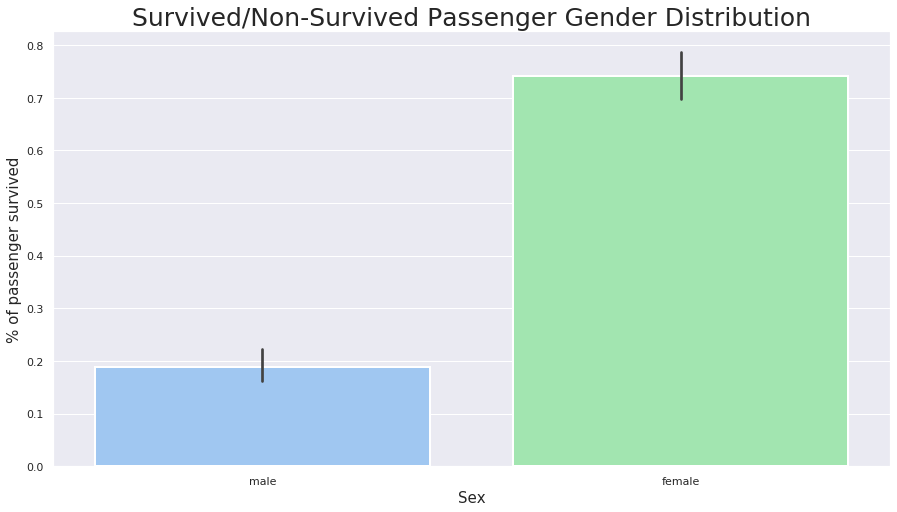

In [0]:
plt.subplots(figsize = (15,8))
sns.barplot(x = "Sex", y = "Survived", data=train,linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Sex",fontsize = 15)

This bar plot above shows the distribution of female and male survived. The x_label shows gender and the y_label shows % of passenger survived. This bar plot shows that 74% female passenger survived while only ~19% male passenger survived.

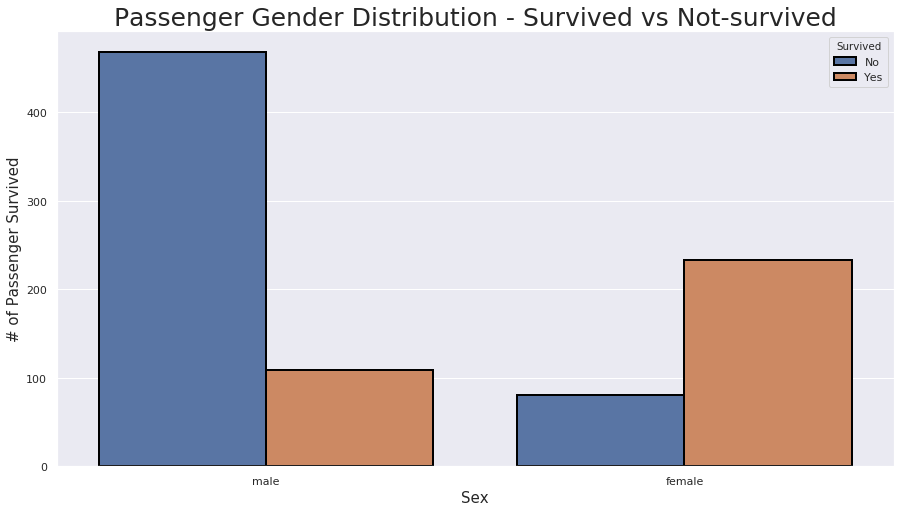

In [0]:
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train,
                   edgecolor=(0,0,0), 
                   linewidth=2)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive. 

**Summary**
***
- As we suspected, female passengers have survived at a much better rate than male passengers. 
- It seems about right since females and children were the priority. 

### 3.2. Pclass and Survived
<a id="pcalss_and_survived"></a>
***

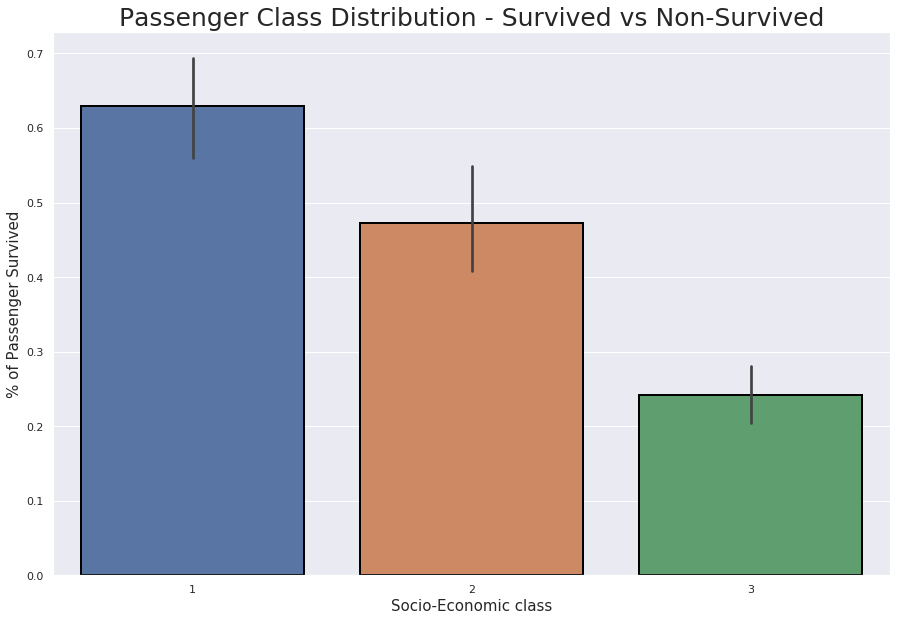

In [0]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", y = "Survived", data=train, edgecolor=(0,0,0), linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);

- It looks like ...
    - ~ 63% first class passenger survived titanic tragedy, while 
    - ~ 48% second class and 
    - ~ only  24% third class passenger survived. 



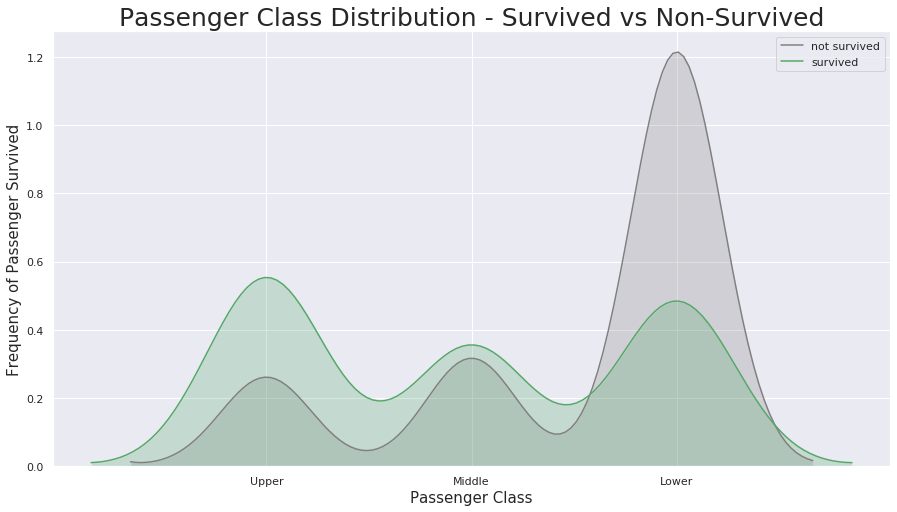

In [0]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , color='g',shade=True, label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

This kde plot is pretty self explanatory with all the labels and colors. Something I have noticed that some readers might find questionable is that in, the plot; the third class passengers have survived more than second class passnegers. It is true since there were a lot more third class passengers than first and second. 

**Summary**
***
First class passenger had the upper hand during the tragedy than second and third class passengers. You can probably agree with me more on this, when we look at the distribution of ticket fare and survived column. 



### 3.3. Fare and Survived
<a id="fare_and_survived"></a>
***

Text(0.5, 0, 'Fare')

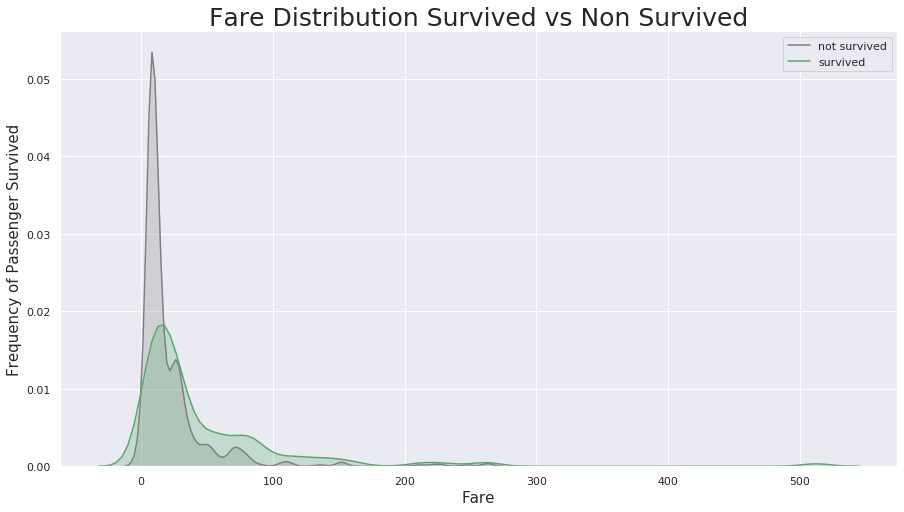

In [0]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Fare", fontsize = 15)



This plot shows somethig really interesting..
- When fare is approximately more than 280 dollars, there is no red shade which mean everyone passed that fare point  survived.
- The spike in the plot under 100 dollar represents that alot of passenger who bought ticket with in that range did not survive. 



## 3.4. Age and Survived
<a id="age_and_survived"></a>
***

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


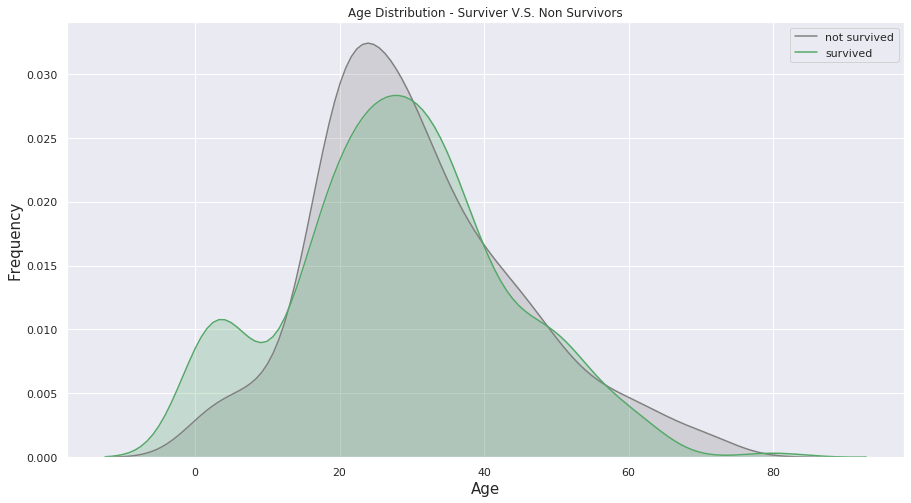

In [0]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors')
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

There is nothing out of the ordinary of about this plot, except the very left part of the distribution. It shows that children and infants were the priority. 

## 3.5. Combined Feature Relations
<a id='combined_feature_relations'></a>
***


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


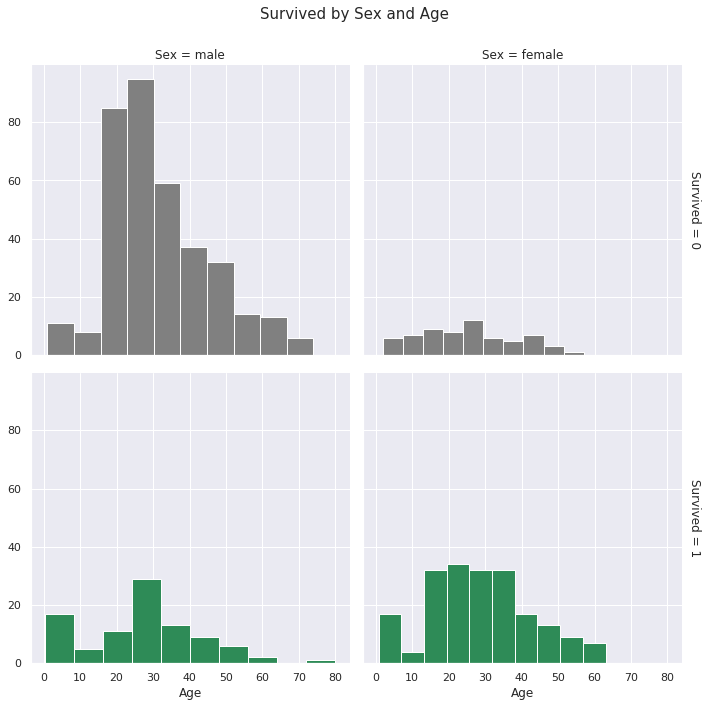

In [0]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 15)
plt.subplots_adjust(top=0.90)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


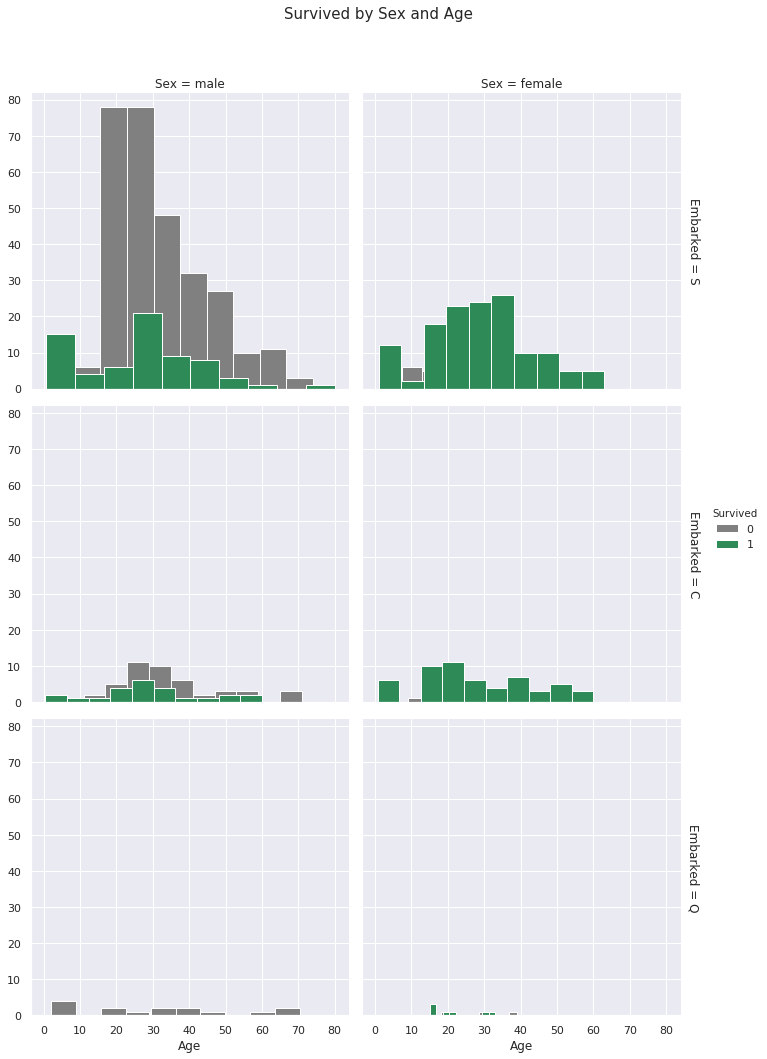

In [0]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 15)
plt.subplots_adjust(top=0.90)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


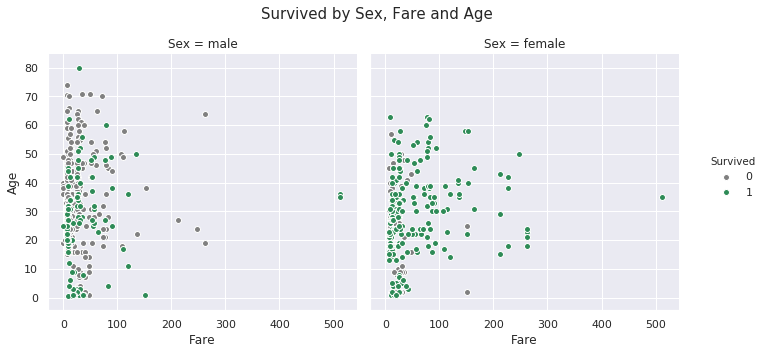

In [0]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 15)
plt.subplots_adjust(top=0.85)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


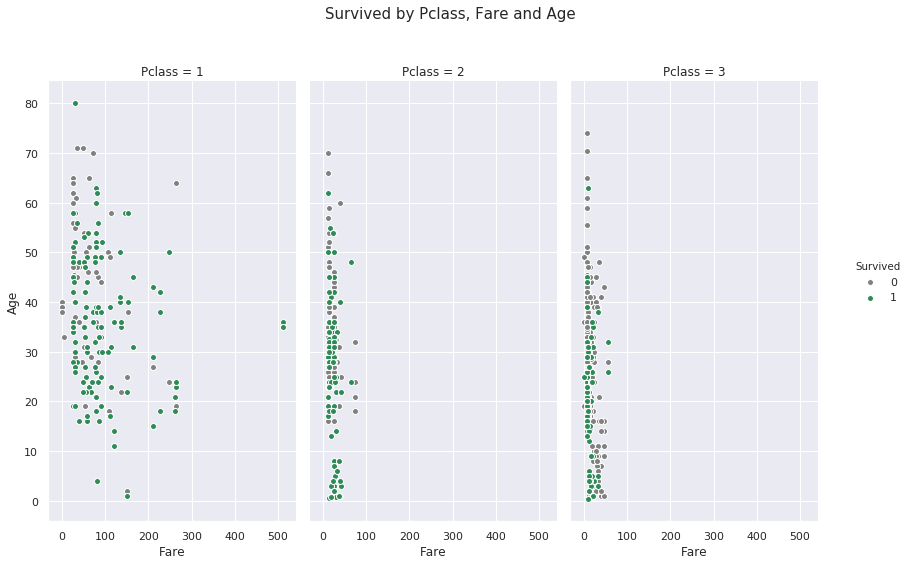

In [0]:
g = sns.FacetGrid(train, size=8, aspect=0.5, hue="Survived", 
                  col ="Pclass", margin_titles=True,
                palette=pal)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Pclass, Fare and Age", size = 15)
plt.subplots_adjust(top=0.85)

In [0]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


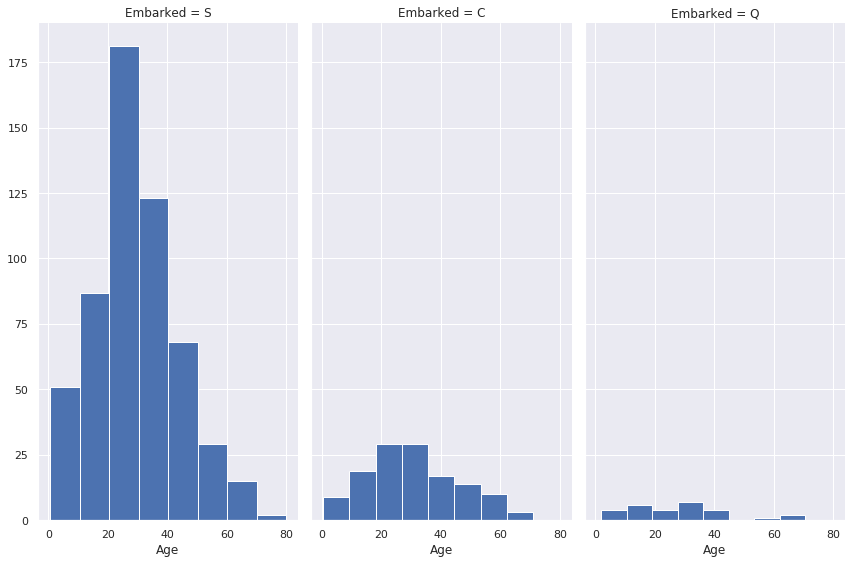

In [0]:
g = sns.FacetGrid(train, col="Embarked",size=8, aspect=.5)
g = g.map(plt.hist, "Age",edgecolor = 'white', bins=8)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Survived, Embarked and Cabin')

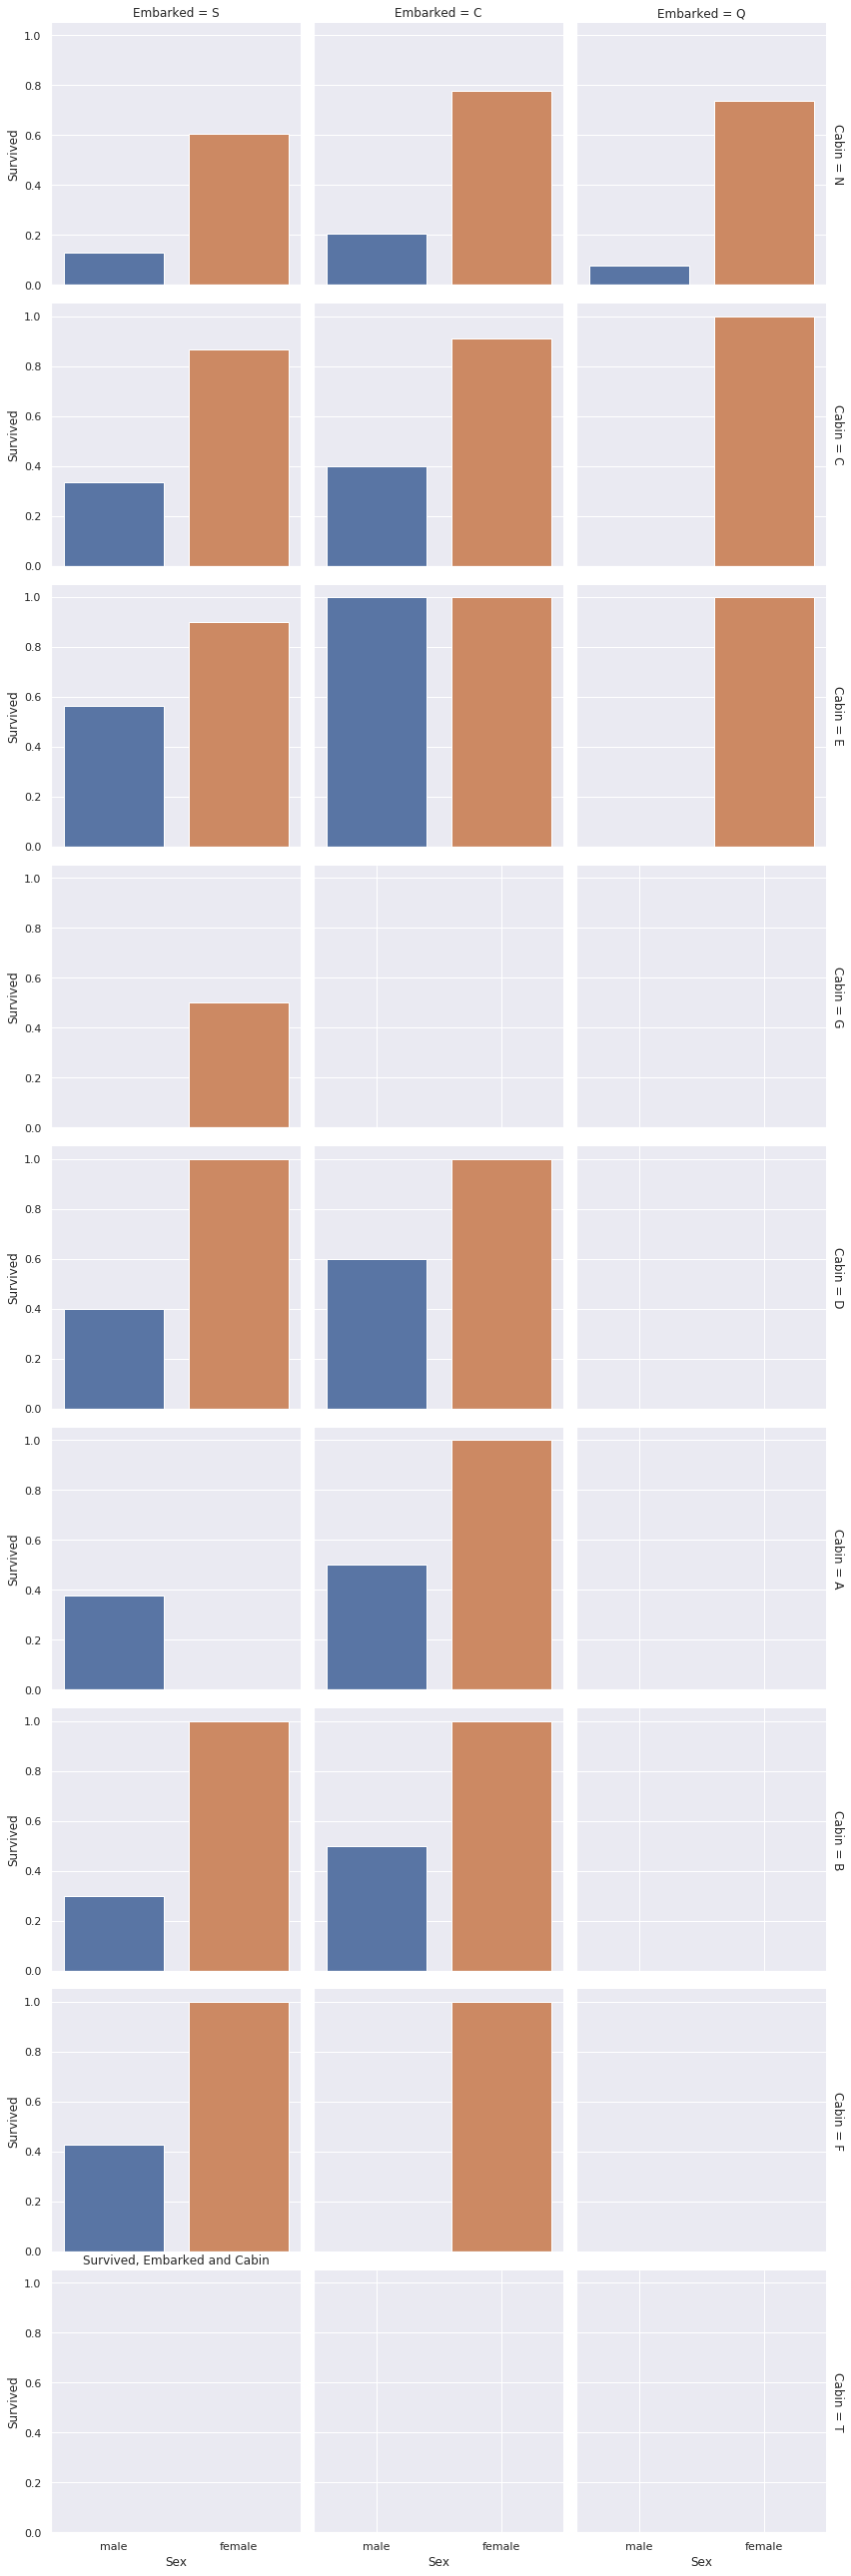

In [0]:
sns.factorplot(y = "Survived",
               x = "Sex",
               col = "Embarked",
               row = "Cabin",
              data = train, 
              kind = "bar",
              ci = None,
               margin_titles=True,
              size = 4)
plt.title("Survived, Embarked and Cabin")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


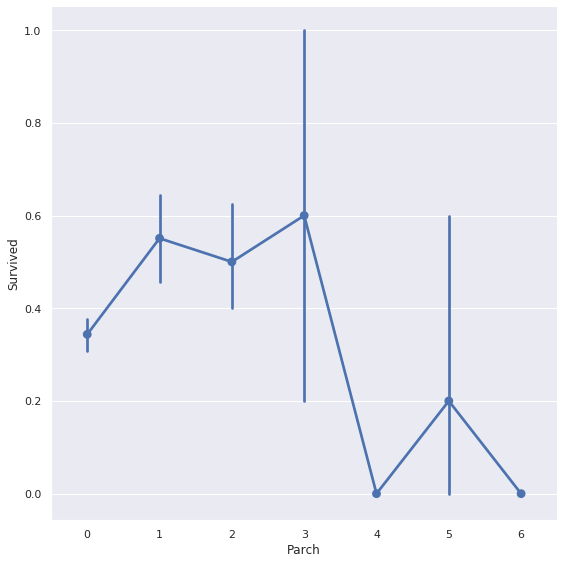

In [0]:
sns.factorplot(x = "Parch", y = "Survived", data = train,kind = "point",size = 8)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


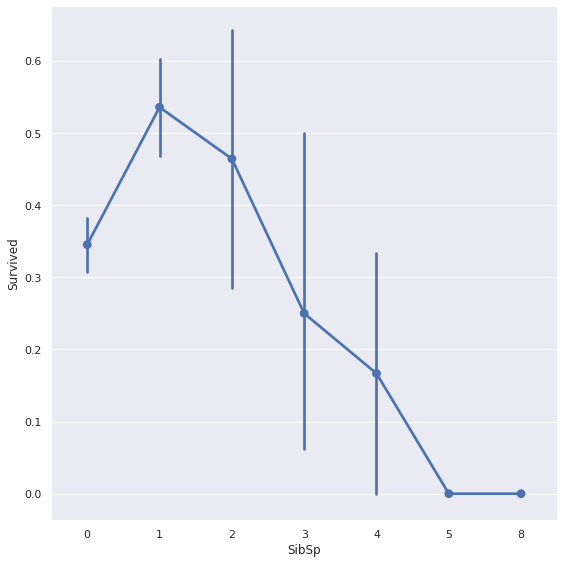

In [0]:
sns.factorplot(x = "SibSp", y = "Survived", data = train,kind = "point",size = 8)

In [0]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [0]:
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

So, we did a couple of steps in part 2, let's review...
***
- We dropped **PassengerId** feature since it will not aid us in any way in creating our model. 
- We assigned Null values in the **Cabin** feature into **N**. 
- We used mean for **Fare** feature and mode for **Embarked** feature to fill up their missing values. 
- We created dummy variables for **Sex** since they are categorical variable.

# <font color='blue'> 4: Statistical Overview
<a id="statisticaloverview"></a>
***

<center><img src="https://cdn.lynda.com/course/503930/503930-637009475898890538-16x9.jpg" height=350 width=550/></center>

In [0]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,S


In [0]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [0]:
train[['Pclass', 'Survived']].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [0]:
# Overview(Survived vs non survied)
survived_summary = train.groupby("Survived")
survived_summary.mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


In [0]:
survived_summary = train.groupby("Sex")
survived_summary.mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
0,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
1,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [0]:
survived_summary = train.groupby("Pclass")
survived_summary.mean()

,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,0.629630,0.564815,38.233441,0.416667,0.356481,84.154687
2,0.472826,0.586957,29.877630,0.402174,0.380435,20.662183
3,0.242363,0.706721,25.140620,0.615071,0.393075,13.675550



There are a couple of points provided below, which should be noted from this statistical overview.
- This data set has 891 raw and 9 columns. 
- only 38% passenger survived during that tragedy.
- ~74% female passenger survived, while only ~19% male passenger survived. 
- ~63% first class passengers survived, while only 24% lower class passenger survived.



### 4.1. Correlation Matrix and Heatmap
<a id="heatmap"></a>
***

In [0]:
## Let's see the correlation between target variables and other features.
train.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [0]:
## get the most important variables 
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived    1.000000
Sex         0.295231
Pclass      0.114569
Fare        0.066207
Parch       0.006663
Age         0.005963
SibSp       0.001248
Name: Survived, dtype: float64

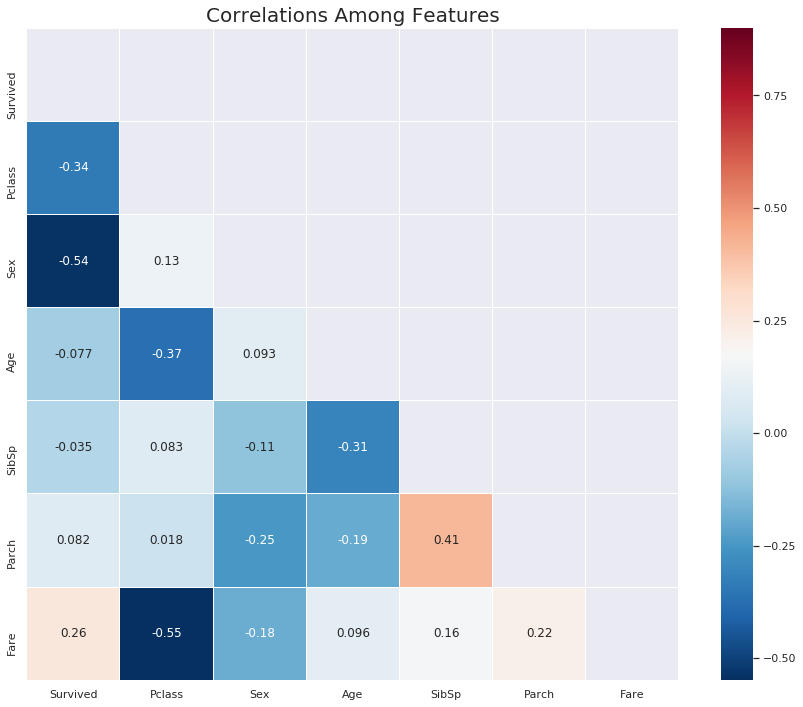

In [0]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

#### Positive Correlation Features:
- Fare and Survived: 0.26

#### Negative Correlation Features:
- Fare and Pclass: -0.55
- Gender and Survived: -0.54
- Pclass and Survived: -0.34


**So, Let's analyze these correlations a bit.** We have found some moderately strong correlations between different features. 
- There is a positive correlation between __Fare__ and __Survived__ rated. 

This can be explained by saying that, the passenger who __paid more money__ for their ticket were __more likely to survive__. This theory aligns with one other correlation which is the correlation between __Fare and Pclass(-0.55)__. 
- This relationship can be explained by saying that __first class passenger(1)__ paid more for fare then __second class passenger(2)__, similarly second class passenger paid more than the __third class passenger(3)__. 

- __Pclass__ correlation with our dependent variable, __Survived__. The correlation between __Pclass and Survived is -0.34__. 

This can also be explained by saying that first class passenger had a better chance of surviving than the second or the third and so on.

However, the biggest correlation with our dependent variable is the __Gender variable__, which basically is the info of whether the passenger was __male or female__. this is a __negative correlation with a magnitude of -0.54__ which definitely points towards some undeniable insights.

# <font color='blue'>5: Feature Engineering</font>
<a id="feature_engineering"></a>
***

## Name_length

In [0]:
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

In [0]:
def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a

In [0]:
train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

In [0]:
## cuts the column by given bins based on the range of name_length
#group_names = ['short', 'medium', 'good', 'long']
#train['name_len_group'] = pd.cut(train['name_length'], bins = 4, labels=group_names)

## Title

In [0]:
## get the title from the name
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
test["title"] = [i.split('.')[0] for i in test.Name]
test["title"]= [i.split(',')[1] for i in test.title]

In [0]:
train.title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Ms                1
 Lady              1
 Jonkheer          1
 Capt              1
 Don               1
 the Countess      1
 Mme               1
 Sir               1
Name: title, dtype: int64

In [0]:
#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]



In [0]:
#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
test['title'] = [i.replace('Ms', 'Miss') for i in test.title]
test['title'] = [i.replace('Dr', 'rare') for i in test.title]
test['title'] = [i.replace('Col', 'rare') for i in test.title]
test['title'] = [i.replace('Dona', 'rare') for i in test.title]
test['title'] = [i.replace('Rev', 'rare') for i in test.title]

In [0]:
train.title.value_counts()

 Mr        517
 Miss      185
 Mrs       126
 Master     40
 rare       23
Name: title, dtype: int64

## Has_cabin

In [0]:
train["has_cabin"] = [0 if i == 'N'else 1 for i in train.Cabin]
test["has_cabin"] = [0 if i == 'N'else 1 for i in test.Cabin]

In [0]:
train.has_cabin.value_counts()

0    687
1    204
Name: has_cabin, dtype: int64

## Cabin feature

In [0]:
print (sorted(train.Cabin.unique()))
print (''.center(45,'*'))
print(sorted(test.Cabin.unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T']
*********************************************
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N']


It looks like there is one more unique values in the training data. This will complicate running machine learning models. therefore when you create dummy variables, we will have to make sure to drop **T** column from training data. 

## child feature

In [0]:
## We are going to create a new feature "age" from the Age feature. 
train['child'] = [1 if i<16 else 0 for i in train.Age]
test['child'] = [1 if i<16 else 0 for i in test.Age]

In [0]:
train.child.value_counts()

0    808
1     83
Name: child, dtype: int64

## family_size feature


In [0]:
## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

In [0]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [0]:
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

## is_alone feature

In [0]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

## Ticket feature

In [0]:
train.Ticket.value_counts().head(10)

1601            7
347082          7
CA. 2343        7
3101295         6
347088          6
CA 2144         6
S.O.C. 14879    5
382652          5
113781          4
LINE            4
Name: Ticket, dtype: int64

It looks like many passengers had travelled as a group during the 

## Fare feature

In [0]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,nLength_group,title,has_cabin,child,family_size,family_group,is_alone
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,S,23,medium,Mr,0,0,2,small,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,51,long,Mrs,1,0,2,small,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,S,22,medium,Miss,0,0,1,loner,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,44,good,Mrs,1,0,2,small,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,S,24,medium,Mr,0,0,1,loner,1


## Calculated_fare feature

In [0]:
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

In [0]:
train.calculated_fare.mean()

19.9163751119176

In [0]:
train.calculated_fare.mode()

0    13.0
dtype: float64

In [0]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a
        
    

In [0]:
train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

In [0]:
#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)

Some people have travelled in groups like family or friends. It seems like Fare column kept a record of the total fare rather  than 

## Creating dummy variables

In [0]:
train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=True)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=True)
train.drop(['Cabin_T', 'family_size','Ticket','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Ticket','Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

## Age feature

In [0]:
pd.options.display.max_columns = 99
train.head()

,Survived,Sex,Age,SibSp,Parch,has_cabin,child,is_alone,calculated_fare,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_2,Pclass_3,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_Q,Embarked_S,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,0,1,22.0,1,0,0,0,0,3.62500,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0
1,1,0,38.0,1,0,1,0,0,35.64165,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2,1,0,26.0,0,0,0,0,1,7.92500,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
3,1,0,35.0,1,0,1,0,0,26.55000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,0,1,35.0,0,0,0,0,1,8.05000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0


In [0]:
front = train['Age']
train.drop(labels=['Age'], axis=1,inplace = True)
train.insert(0, 'Age', front)
train.head()

,Age,Survived,Sex,SibSp,Parch,has_cabin,child,is_alone,calculated_fare,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_2,Pclass_3,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_Q,Embarked_S,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,22.0,0,1,1,0,0,0,0,3.62500,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0
1,38.0,1,0,1,0,1,0,0,35.64165,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2,26.0,1,0,0,0,0,0,1,7.92500,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
3,35.0,1,0,1,0,1,0,0,26.55000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,35.0,0,1,0,0,0,0,1,8.05000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0


In [0]:
front = test['Age']
test.drop(labels=['Age'], axis=1,inplace = True)
test.insert(0, 'Age', front)
test.head()

,Age,Sex,SibSp,Parch,has_cabin,child,is_alone,calculated_fare,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_2,Pclass_3,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_Q,Embarked_S,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,34.5,1,0,0,0,0,1,7.829200,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0
1,47.0,0,1,0,0,0,0,3.500000,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0
2,62.0,1,0,0,0,0,1,9.687500,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0
3,27.0,1,0,0,0,0,1,8.662500,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0
4,22.0,0,1,1,0,0,0,4.095833,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0


In [0]:
train.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [0]:
# importing missing values using KNN for age column. 
from fancyimpute import KNN
age_train = KNN(k=10).fit_transform(train)

train = pd.DataFrame(age_train, columns = train.columns)
train.head(2)

Imputing row 1/891 with 0 missing, elapsed time: 0.216
Imputing row 101/891 with 0 missing, elapsed time: 0.217
Imputing row 201/891 with 0 missing, elapsed time: 0.218
Imputing row 301/891 with 1 missing, elapsed time: 0.219
Imputing row 401/891 with 0 missing, elapsed time: 0.220
Imputing row 501/891 with 0 missing, elapsed time: 0.221
Imputing row 601/891 with 0 missing, elapsed time: 0.222
Imputing row 701/891 with 0 missing, elapsed time: 0.223
Imputing row 801/891 with 0 missing, elapsed time: 0.224


,Age,Survived,Sex,SibSp,Parch,has_cabin,child,is_alone,calculated_fare,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_2,Pclass_3,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_Q,Embarked_S,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,22.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.62500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,38.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,35.64165,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [0]:
# importing missing values using KNN for age column. 
from fancyimpute import KNN
age_test = KNN(k=10).fit_transform(test)

test = pd.DataFrame(age_test, columns = test.columns)
test.head(2)

Imputing row 1/418 with 0 missing, elapsed time: 0.058
Imputing row 101/418 with 0 missing, elapsed time: 0.059
Imputing row 201/418 with 1 missing, elapsed time: 0.060
Imputing row 301/418 with 0 missing, elapsed time: 0.061
Imputing row 401/418 with 0 missing, elapsed time: 0.062


,Age,Sex,SibSp,Parch,has_cabin,child,is_alone,calculated_fare,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_2,Pclass_3,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_Q,Embarked_S,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,34.5,1.0,0.0,0.0,0.0,0.0,1.0,7.8292,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,47.0,0.0,1.0,0.0,0.0,0.0,0.0,3.5000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [0]:
## create bins for age
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        

In [0]:
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

In [0]:
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True)

In [0]:
"""train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)"""

"train.drop('Age', axis=1, inplace=True)\ntest.drop('Age', axis=1, inplace=True)"

# <font color='blue'>6: Pre-Modeling Tasks</font>

### 6.1. Separating dependent and independent variables
<a id="dependent_independent"></a>
***

In [0]:
# separating our independent and dependent variable
X = train.drop(['Survived'], axis=1)
y = train["Survived"]

In [0]:
#age_filled_data_nor = NuclearNormMinimization().complete(df1)
#Data_1 = pd.DataFrame(age_filled_data, columns = df1.columns)
#pd.DataFrame(zip(Data["Age"],Data_1["Age"],df["Age"]))

### 6.2. Splitting the training data
<a id="split_training_data" ></a>
***


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .33, random_state = 1)

In [0]:
x_train.head()

,Age,Sex,SibSp,Parch,has_cabin,child,is_alone,calculated_fare,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_2,Pclass_3,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_Q,Embarked_S,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
496,54.000000,0.0,1.0,0.0,1.0,0.0,0.0,39.133350,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0
14,14.000000,0.0,0.0,0.0,0.0,1.0,1.0,7.854200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0
82,16.323306,0.0,0.0,0.0,0.0,0.0,1.0,7.787500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0
657,32.000000,0.0,1.0,1.0,0.0,0.0,0.0,5.166667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0
388,28.077594,1.0,0.0,0.0,0.0,0.0,1.0,7.729200,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0


### 6.3. Feature Scaling
<a id="feature_scaling" ></a>
***


In [0]:
x_train.head()

,Age,Sex,SibSp,Parch,has_cabin,child,is_alone,calculated_fare,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_2,Pclass_3,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_Q,Embarked_S,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
496,54.000000,0.0,1.0,0.0,1.0,0.0,0.0,39.133350,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0
14,14.000000,0.0,0.0,0.0,0.0,1.0,1.0,7.854200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0
82,16.323306,0.0,0.0,0.0,0.0,0.0,1.0,7.787500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0
657,32.000000,0.0,1.0,1.0,0.0,0.0,0.0,5.166667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0
388,28.077594,1.0,0.0,0.0,0.0,0.0,1.0,7.729200,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
test = sc.transform(test)

# <font color='blue'>7: Modeling the Data</font>
<a id="modelingthedata"></a>
***
I will train the data with the following models:
- Logistic Regression
- K-Nearest Neighbors(KNN)
- Gaussian Naive Bayes
- Support Vector Machines
- Decision Tree Classifier
- Bagging on Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier



In [0]:
## Necessary modules for creating models. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

### 7.1. Logistic Regression
<a id="logistic_regression"></a>
***

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
logreg_accy = round(accuracy_score(y_pred,y_test), 3)
print (logreg_accy)

0.79


In [0]:
print (classification_report(y_test, y_pred, labels=logreg.classes_))
print (confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82       174
         1.0       0.75      0.74      0.74       121

    accuracy                           0.79       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295

[[144  32]
 [ 30  89]]


### Grid Search on Logistic Regression

In [0]:
C_vals = [0.0001, 0.001, 0.01, 0.1,0.13,0.2, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 4.0,4.5,5.0,5.1,5.5,6.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

param = {'penalty': penalties, 'C': C_vals, }
grid = GridSearchCV(logreg, param,verbose=False, cv = StratifiedKFold(n_splits=5,random_state=15,shuffle=True), n_jobs=1)

In [0]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.13, 0.2, 0.15, 0.25,
                               0.275, 0.33, 0.5, 0.66, 0.75, 1.0, 2.5, 4.0, 4.5,
                               5.0, 5.1, 5.5, 6.0, 10.0, 100.0, 1000.0],
                         'penalty': [

In [0]:
print (grid.best_params_)
print (grid.best_score_)

{'C': 0.33, 'penalty': 'l1'}
0.8473154362416108


In [0]:
logreg_grid = LogisticRegression(penalty=grid.best_params_['penalty'], C=grid.best_params_['C'],random_state=1)
logreg_grid.fit(x_train,y_train)
y_pred = logreg_grid.predict(x_test)
logreg_accy = round(accuracy_score(y_test, y_pred), 3)
print (logreg_accy)

0.783


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print (classification_report(y_test, y_pred, labels=logreg_grid.classes_))

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82       174
         1.0       0.74      0.73      0.73       121

    accuracy                           0.78       295
   macro avg       0.78      0.77      0.78       295
weighted avg       0.78      0.78      0.78       295



0.8297235679680821


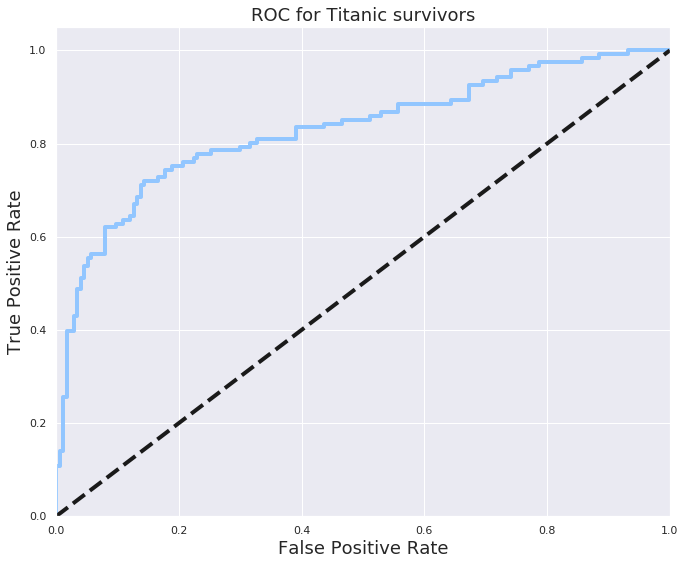

In [0]:
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-pastel')
y_score = logreg_grid.decision_function(x_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

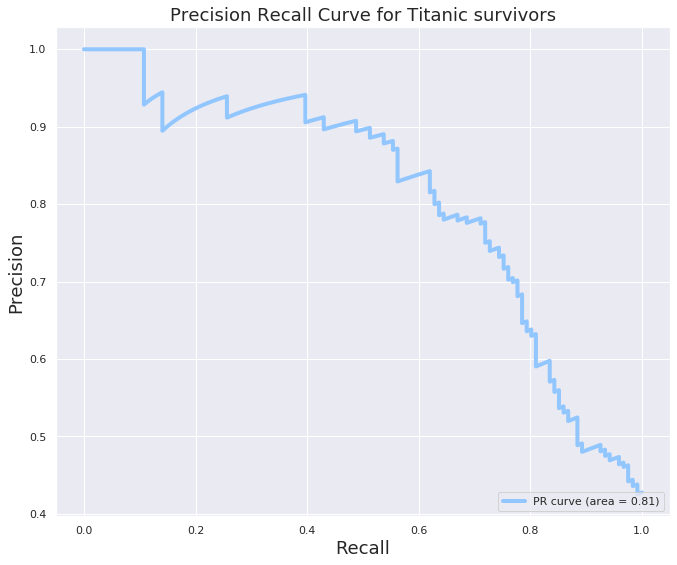

In [0]:
plt.style.use('seaborn-pastel')

y_score = logreg_grid.decision_function(x_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 7.2. KNN classifier
<a id="knn"></a>
***

[17, 0.7661016949152543]


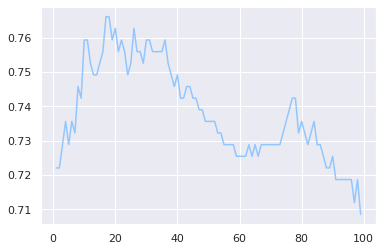

In [0]:
from sklearn.neighbors import KNeighborsClassifier
## choosing the best n_neighbors
nn_scores = []
best_prediction = [-1,-1]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='minkowski', p =2)
    knn.fit(x_train,y_train)
    score = accuracy_score(y_test, knn.predict(x_test))
    #print i, score
    if score > best_prediction[1]:
        best_prediction = [i, score]
    nn_scores.append(score)
    
print (best_prediction)
plt.plot(range(1,100),nn_scores)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights="distance", n_neighbors=45,  metric='minkowski', p =2)
#n_neighbors: specifies how many neighbors will vote on the class
#weights: uniform weights indicate that all neighbors have the same weight while "distance" indicates
        # that points closest to the 
#metric and p: when distance is minkowski (the default) and p == 2 (the default), this is equivalent to the euclidean distance metric
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)

0.742


### Grid search on KNN classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
n_neighbors=range(1,50)
weights=['uniform','distance']
param = {'n_neighbors':n_neighbors, 'weights':weights}
grid2 = GridSearchCV(knn, param,verbose=False, cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True))
grid2.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [0]:
print (grid2.best_params_)
print (grid2.best_score_)

{'n_neighbors': 9, 'weights': 'uniform'}
0.8204697986577181


In [0]:
knn_grid = KNeighborsClassifier(
    n_neighbors = grid2.best_params_['n_neighbors'], 
    weights = grid2.best_params_['weights'],
    n_jobs = -1, 
)
knn_grid.fit(x_train,y_train)
y_pred = knn_grid.predict(x_test)
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)

0.753


### 7.3. Gaussian Naive Bayes
<a id="gaussian_naive"></a>
***

In [0]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

0.708


### 7.4. Support Vector Machines
<a id="svm"></a>
***

In [0]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf', probability=True, random_state = 1, C = 2)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc_accy = round(accuracy_score(y_pred, y_test), 3)
print(svc_accy)

0.78


### 7.5. DecisionTree Classifier
<a id="decision_tree"></a>
***

In [0]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier( max_depth=5, 
                                class_weight = 'balanced',
                                min_weight_fraction_leaf = 0.01)
dectree.fit(x_train, y_train)
y_pred = dectree.predict(x_test)
dectree_accy = round(accuracy_score(y_pred, y_test), 3)
print(dectree_accy)

0.776


### Grid search on Decision Tree

In [0]:
max_depth = range(1,30)
# max_feature = [1,2,3,4,5,6,7,8,9,10,11,12,15,16,18,20,22,'auto']
max_feature = ['auto']
grid3 = {'max_depth':max_depth, 'max_features':max_feature}
decisiontree_grid = GridSearchCV(dectree, grid3, verbose=False, cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True))
decisiontree_grid.fit(x_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.01,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 30), 'max_featu

In [0]:
print( decisiontree_grid.best_params_)
print (decisiontree_grid.best_score_)


{'max_depth': 15, 'max_features': 'auto'}
0.8271812080536913


In [0]:
#Decision Tree grid/
from sklearn.tree import DecisionTreeClassifier

dectree_grid = DecisionTreeClassifier( max_depth=decisiontree_grid.best_params_['max_depth'],
                                 max_features=decisiontree_grid.best_params_['max_features'], 
                                class_weight = 'balanced',
                                min_weight_fraction_leaf = 0.01,
                                random_state=1)
dectree_grid.fit(x_train, y_train)
y_pred = dectree_grid.predict(x_test)
dectree_accy = round(accuracy_score(y_pred, y_test), 3)
print(dectree_accy)

0.739


### 7.6. Random Forest Classifier
<a id="random_forest"></a>

In [0]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=150,max_depth=10,min_samples_split=6, min_samples_leaf=4,random_state=1)
#randomforest = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
random_accy = round(accuracy_score(y_pred, y_test), 3)
print (random_accy)

0.793


In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 26,
                                  max_depth = 6, 
                                  max_features = 'sqrt')

pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)

cv_result = cross_validate(pipeline, X, y, cv= 10)
print("CV Test Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_result['test_score']), \
                                                     np.std(cv_result['test_score'])))

CV Test Score : Mean - 0.818173 | Std - 0.03720765 


In [0]:
test_x = test

In [0]:
predictions = pipeline.predict(test_x)
submission = pd.DataFrame({"PassengerId": passengerid, "Survived": predictions.astype(np.int32)})
submission.to_csv("submission_test.csv", index=False)

### 7.7. Gradient Boosting Classifier
<a id="gradient_boosting"></a>
***

In [0]:
# # Gradient Boosting Classifier
# from sklearn.ensemble import GradientBoostingClassifier

# gradient = GradientBoostingClassifier()
# gradient.fit(x_train, y_train)
# y_pred = gradient.predict(x_test)
# gradient_accy = round(accuracy_score(y_pred, y_test), 3)
# print(gradient_accy)

### 7.8. XGBClassifier
<a id="XGBClassifier"></a>
***

In [0]:
# from xgboost import XGBClassifier
# XGBClassifier = XGBClassifier()
# XGBClassifier.fit(x_train, y_train)
# y_pred = XGBClassifier.predict(x_test)
# XGBClassifier_accy = round(accuracy_score(y_pred, y_test), 3)
# print(XGBClassifier_accy)

### 7.9. AdaBoost Classifier
<a id="XGBClassifier"></a>
***

In [0]:
# from sklearn.ensemble import AdaBoostClassifier
# adaboost = AdaBoostClassifier()
# adaboost.fit(x_train, y_train)
# y_pred = adaboost.predict(x_test)
# adaboost_accy = round(accuracy_score(y_pred, y_test), 3)
# print(adaboost_accy)


### 7.10. Bagging Classifier
<a id="XGBClassifier"></a>
***

In [0]:
# from sklearn.ensemble import BaggingClassifier
# BaggingClassifier = BaggingClassifier()
# BaggingClassifier.fit(x_train, y_train)
# y_pred = BaggingClassifier.predict(x_test)
# bagging_accy = round(accuracy_score(y_pred, y_test), 3)
# print(bagging_accy)

### 7.11. Extra Trees Classifier
<a id="XGBClassifier"></a>
***

In [0]:
# from sklearn.ensemble import ExtraTreesClassifier
# ExtraTreesClassifier = ExtraTreesClassifier()
# ExtraTreesClassifier.fit(x_train, y_train)
# y_pred = ExtraTreesClassifier.predict(x_test)
# extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
# print(extraTree_accy)


### 7.12. Voting Classifier
<a id="voting_classifer"></a>
***

In [0]:
# from sklearn.ensemble import VotingClassifier

# voting_classifier = VotingClassifier(estimators=[
#     ('logreg_grid', logreg_grid),
#     ('logreg',logreg), 
#     ('svc', svc),
#     ('random_forest', randomforest),
#     ('gradient_boosting', gradient),
#     ('decision_tree',dectree), 
#     ('decision_tree_grid',decisiontree_grid), 
#     ('knn',knn),
#     ('knn_grid', knn_grid),
#     ('XGB Classifier', XGBClassifier),
#     ('BaggingClassifier', BaggingClassifier),
#     ('ExtraTreesClassifier', ExtraTreesClassifier)], voting='hard',
#     )

# voting_classifier = voting_classifier.fit(x_train,y_train)

In [0]:
# y_pred = voting_classifier.predict(x_test)
# voting_accy = round(accuracy_score(y_pred, y_test), 3)
# print(voting_accy)

In [0]:
# models = pd.DataFrame({
#     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
#               'Random Forest', 'Naive Bayes', 
#               'Decision Tree', 'Gradient Boosting Classifier', 'Voting Classifier', 'XGB Classifier','ExtraTrees Classifier','Bagging Classifier'],
#     'Score': [svc_accy, knn_accy, logreg_accy, 
#               random_accy, gaussian_accy, dectree_accy,
#                gradient_accy, voting_accy, XGBClassifier_accy, extraTree_accy, bagging_accy]})
# models.sort_values(by='Score', ascending=False)

#<font color='blue'>8: Model Accuracy Visualization
<a id="model_accuracy"></a>
***

In [0]:
# %matplotlib inline
# sns.set_color_codes("muted")
# ax=plt.subplots(figsize=(10,8))
# ax=sns.barplot(y='Model',x='Score',data=models,color='b')
# ax.set_xlabel('Accuracy',fontsize=20)
# plt.ylabel('Classifier',fontsize=20)
# plt.grid(color='r', linestyle='-', linewidth=0.5)
# plt.title('Classifier Accuracy',fontsize=20)

From the above accuracy plot we can see that 
- __Random_forest__
- __Voting_classifier__
- __XGB_clssifier__

are the best performing models


# <font color='blue'>9: Submit test predictions</font>
<a id="submit_predictions"></a>
***

In [0]:
# test_prediction = voting_classifier.predict(test)
# submission = pd.DataFrame({
#         "PassengerId": passengerid,
#         "Survived": test_prediction
#     })

# submission.PassengerId = submission.PassengerId.astype(int)
# submission.Survived = submission.Survived.astype(int)

# submission.to_csv("final_submission.csv", index=False)

Now download this submission file and upload it to kaggle for further evaluation. 

Once you hit submit button __Kaggle Predict__ you __Public Score__ and __Rank__ in the Leaderboard. 

In [0]:
submission.head()